In [ ]:
'''
1. What assets? What dates, etc.
   "TSLA" stands for Tesla Inc and is a firm that mainly sells electric vehicles.
   This analysis is based on stock price data from January 1, 2020 to June 1, 2020.

2. Description of strategies, both mathematical and intuitive
   SMA is calculated by adding all the prices during the period and dividing the total by the number of periods.
   The SMA crossover strategy is to decide a short position (sell) or a long position (buy) when different SMAs cross.
   The heatmap contains values that represent different shades of the same color for each plotted value.
   In this assignment, it is used to analyze the correlation between different SMAs.

3. Select graphs from the output to include and explain it. What is the main message of the graphs?
 3-1. As a result of the benchmark test first, the total return was about 625%.
 　　 In other words, it can be said that it is a very investment-efficient stock.
 3-2. Next, as a result of analyzing the correlation between SMA short (20-40) and SMA long (150-250) with a heat map, 
      it was found that Short = 31, Long = 150 is the best practice.
 3-3. Looking at the SMA and stock charts, it has been in a long position since at least August 2020. 
      In other words, the stock price is on the uptrend and it is time to buy. 
      However, since it crossed over in June 2021, it is in a downtrend. In other words, it is the timing of selling.
'''

In [ ]:
'''
4. Comment on the heatmaps.
   Short = 31, Long = 150 are the best. For Long, the results tend to be worse after 225 days. 
   On the other hand, for Short, the results were relatively good in 25-40 days. 
   I understand that the standard value of Long is often 150.
'''

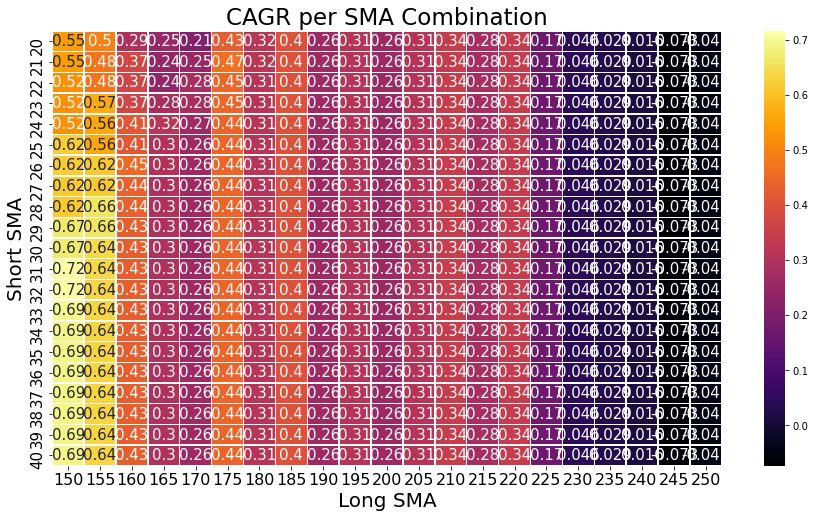

In [7]:
# Plot heatmap

# Set figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the heatmap
ax = sns.heatmap(data       = CAGR,            # Data for plot (3 dimensional)
                 annot      = True,            # Annotate with values
                 annot_kws  = {"fontsize":15}, # Size of annotation
                 linewidths = 0.5,             # Size of gridlines
                 cmap       = "inferno")       # Style (viridis, plasma, inferno, magma, cividis)

# Change size of x-axis & y-axis tickmarks
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)

# Customize labels
ax.set_xlabel("Long SMA", fontsize = 20)
ax.set_ylabel("Short SMA", fontsize = 20)
ax.set_title("CAGR per SMA Combination",fontsize = 23)

# Show plot
plt.show()

# More color options here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

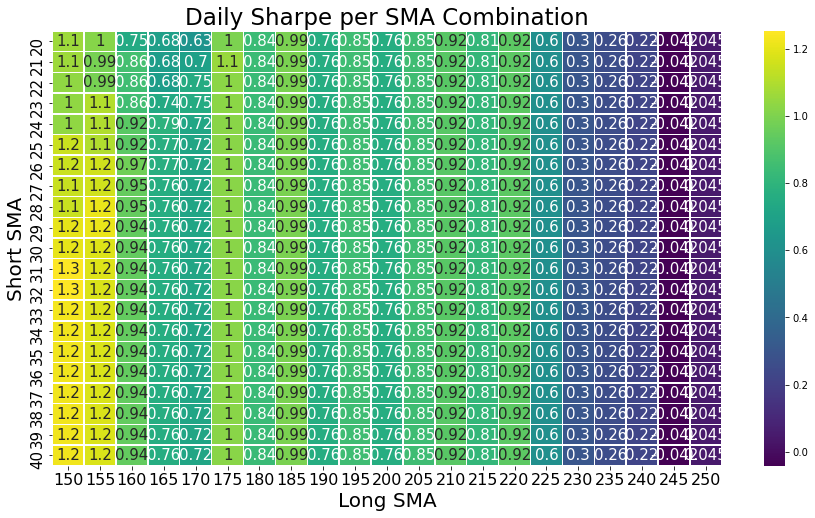

In [9]:
# Plot heatmap

# Set figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the heatmap
ax = sns.heatmap(data       = Sharpe,          # Data for plot (3 dimensional)
                 annot      = True,            # Annotate with values
                 annot_kws  = {"fontsize":15}, # Size of annotation
                 linewidths = 0.5,             # Size of gridlines
                 cmap       = "viridis")       # Style (viridis, plasma, inferno, magma, cividis)

# Change size of x-axis & y-axis tickmarks
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)

# Customize labels
ax.set_xlabel("Long SMA", fontsize = 20)
ax.set_ylabel("Short SMA", fontsize = 20)
ax.set_title("Daily Sharpe per SMA Combination",fontsize = 23)

# Show plot
plt.show()

# More color options here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
'''
5. Compare to the benchmark of buy and hold TSLA. Comment on SMA Crossover vs buy and hold strategies.
   I was surprised that the simple strategy gave better results. 
   I would like to utilize the skills I acquired in this course for future asset management.
   I appreciate Michael Raleigh, Ph.D.,  Jack (TA), and Sebastian (LLA).
'''


Stat                 Benchmark
-------------------  -----------
Start                2020-01-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         624.98%
Daily Sharpe         2.10
Daily Sortino        3.81
CAGR                 305.32%
Max Drawdown         -60.62%
Calmar Ratio         5.04

MTD                  -0.21%
3m                   -13.16%
6m                   6.69%
YTD                  -11.59%
1Y                   247.34%
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  305.32%

Daily Sharpe         2.10
Daily Sortino        3.81
Daily Mean (ann.)    175.07%
Daily Vol (ann.)     83.20%
Daily Skew           0.06
Daily Kurt           2.62
Best Day             19.89%
Worst Day            -21.06%

Monthly Sharpe       1.62
Monthly Sortino      6.08
Monthly Mean (ann.)  148.81%
Monthly Vol (ann.)   92.11%
Monthly Skew         0.87
Monthly Kurt         0.16
Best Month           74.14%
Worst Month          -21.55%


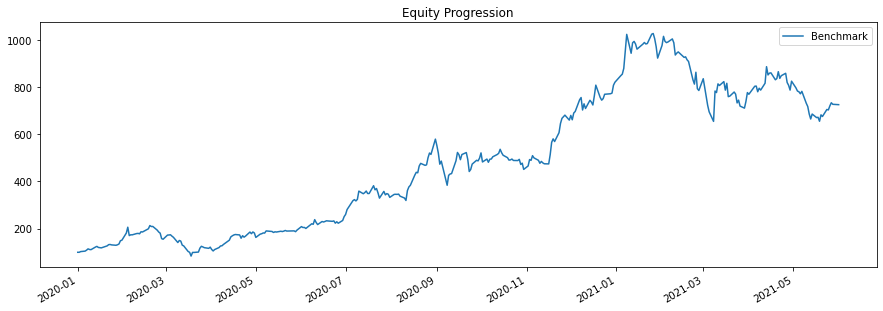

In [2]:

import bt                          # Backtesting package                   
import warnings
import talib as ta                 # Trading Analytics Library
import numpy as np                 # Mathematical computation package
import pandas as pd                # Data science fundamentals package
import seaborn as sns              # Advanced visual graphics package
from tqdm.notebook import tqdm     # Loop progress bar
import matplotlib.pyplot as plt    # Visual graphics package
%matplotlib inline

#pd.options.display.max_rows=None
warnings.filterwarnings('ignore')       # Don't show warnings

#TSLA buy and hold strategy
price_data = bt.get('TSLA', start= '2020-01-01', end = '2021-06-01')

bench_strat = bt.Strategy('Benchmark', [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

benchmark_test = bt.Backtest(bench_strat, price_data)

res = bt.run(benchmark_test)

res.plot()

res.display()

In [3]:
# Create a function that will backtest SMA strategies
def ma_crossover(data = pd.DataFrame(), 
                 SMA_short_per = 50,
                 SMA_long_per  = 200,
                 strategy_name = 'Benchmark'):
    
    sma_short = data.rolling(SMA_short_per).mean()
    sma_long = data.rolling(SMA_long_per).mean()
    
    ticker_count = len(data.columns)
    
    target_weights = sma_long.copy()
    target_weights[sma_short > sma_long] = 1/ticker_count
    target_weights[sma_short <= sma_long] = -(1/ticker_count)

    strategy = bt.Strategy(strategy_name, 
                           [bt.algos.WeighTarget(target_weights),
                            bt.algos.Rebalance()])

    return bt.Backtest(strategy, data)

In [4]:
# Instantiate tickers
tickers = 'TSLA'
start_date = '2020-01-01'
end_date = '2021-06-01'
# Get data
price_data = bt.get(tickers, start = start_date, end=end_date)

# Create placeholder for SMAs, CAGR, & Daily Sharpe
results_df = pd.DataFrame(columns = ['Short_SMA', 'Long_SMA', 
                                     'CAGR', 'Daily_Sharpe'])

# Loop over different short SMAs
for short_sma in tqdm(np.arange(20, 41, 1)):
    
    # Loop over different long SMAs:
    for long_sma in np.arange(150, 251, 5):
        
        # Define the strategy name
        strategy_name = 'SMA_'+ str(short_sma) + '_' + str(long_sma)
        
        # Run the backtest for each SMA combination
        result = bt.run(ma_crossover(data          = price_data,
                                     SMA_short_per = short_sma,
                                     SMA_long_per  = long_sma,
                                     strategy_name = strategy_name))
        
        # Save some figures into variable for easy access
        CAGR = result.stats.at['cagr', strategy_name]
        
        Daily_Sharpe = result.stats.at['daily_sharpe', strategy_name]
        
        # Append the figures we're interested in to our result dataframe
        results_df= results_df.append({'Short_SMA'    : short_sma.astype(int),
                                       'Long_SMA'     : long_sma.astype(int),
                                       'CAGR'         : CAGR,
                                       'Daily_Sharpe' : Daily_Sharpe}, 
                                      ignore_index=True)
        
        
# Set Short & Long columns as integers for aesthetics
results_df['Short_SMA'] = results_df['Short_SMA'].astype(int)
results_df['Long_SMA'] = results_df['Long_SMA'].astype(int)

In [5]:
# Best strategy in terms of CAGR
index_highest_cagr = results_df['CAGR'].idxmax(5)

# Print values of best strategy in terms of CAGR
results_df.loc[[index_highest_cagr]]

,Short_SMA,Long_SMA,CAGR,Daily_Sharpe
231,31,150,0.715981,1.252978


In [6]:
# Prepare data for CAGR Heatmap
CAGR = results_df.pivot(index='Short_SMA', columns='Long_SMA', values = 'CAGR')

CAGR

Long_SMA,150,155,160,165,170,175,180,185,190,195,...,205,210,215,220,225,230,235,240,245,250
Short_SMA,,,,,,,,,,,,,,,,,,,,,
20,0.545808,0.496346,0.290719,0.247409,0.209303,0.426631,0.318839,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
21,0.545808,0.475229,0.373583,0.242331,0.250813,0.465307,0.318839,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
22,0.523999,0.475229,0.367981,0.242331,0.284729,0.446945,0.314911,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
23,0.523999,0.569920,0.367981,0.284974,0.284729,0.446945,0.314911,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
24,0.523999,0.563536,0.414941,0.319819,0.268628,0.442636,0.314911,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
25,0.621837,0.563536,0.414941,0.303278,0.264849,0.442636,0.314911,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
26,0.621837,0.617202,0.453304,0.303278,0.264849,0.442636,0.314911,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
27,0.615235,0.617202,0.435091,0.299396,0.264849,0.442636,0.314911,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717
28,0.615235,0.661049,0.435091,0.299396,0.264849,0.442636,0.314911,0.399165,0.263266,0.309452,...,0.30977,0.343348,0.283677,0.341137,0.170427,0.045568,0.029137,0.016053,-0.073322,-0.042717


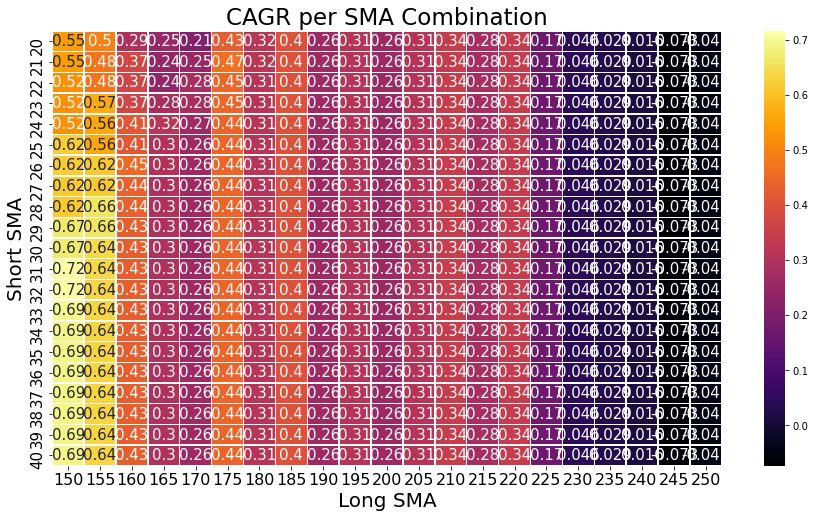

In [7]:
# Plot heatmap

# Set figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the heatmap
ax = sns.heatmap(data       = CAGR,            # Data for plot (3 dimensional)
                 annot      = True,            # Annotate with values
                 annot_kws  = {"fontsize":15}, # Size of annotation
                 linewidths = 0.5,             # Size of gridlines
                 cmap       = "inferno")       # Style (viridis, plasma, inferno, magma, cividis)

# Change size of x-axis & y-axis tickmarks
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)

# Customize labels
ax.set_xlabel("Long SMA", fontsize = 20)
ax.set_ylabel("Short SMA", fontsize = 20)
ax.set_title("CAGR per SMA Combination",fontsize = 23)

# Show plot
plt.show()

# More color options here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [8]:
# Prepare data for Sharpe Heatmap
Sharpe = results_df.pivot(index='Short_SMA', columns='Long_SMA', values = 'Daily_Sharpe')

Sharpe

Long_SMA,150,155,160,165,170,175,180,185,190,195,...,205,210,215,220,225,230,235,240,245,250
Short_SMA,,,,,,,,,,,,,,,,,,,,,
20,1.063250,1.015725,0.746295,0.683888,0.628757,0.996993,0.842400,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
21,1.063250,0.989347,0.863671,0.676106,0.695110,1.055216,0.842400,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
22,1.037463,0.989347,0.855953,0.676106,0.747737,1.027761,0.835658,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
23,1.037463,1.104797,0.855953,0.740490,0.747737,1.027761,0.835658,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
24,1.037463,1.097226,0.919702,0.791562,0.722924,1.021268,0.835658,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
25,1.150380,1.097226,0.919702,0.767483,0.717054,1.021268,0.835658,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
26,1.150380,1.159948,0.970266,0.767483,0.717054,1.021268,0.835658,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
27,1.142968,1.159948,0.946424,0.761788,0.717054,1.021268,0.835658,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119
28,1.142968,1.209710,0.946424,0.761788,0.717054,1.021268,0.835658,0.992031,0.757998,0.848838,...,0.85284,0.916214,0.813938,0.924253,0.595393,0.303147,0.260062,0.221305,-0.041965,0.045119


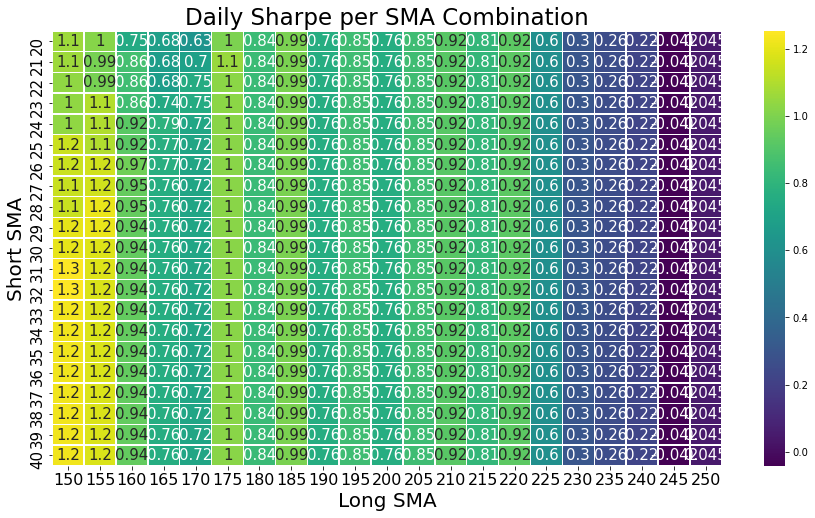

In [9]:
# Plot heatmap

# Set figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the heatmap
ax = sns.heatmap(data       = Sharpe,          # Data for plot (3 dimensional)
                 annot      = True,            # Annotate with values
                 annot_kws  = {"fontsize":15}, # Size of annotation
                 linewidths = 0.5,             # Size of gridlines
                 cmap       = "viridis")       # Style (viridis, plasma, inferno, magma, cividis)

# Change size of x-axis & y-axis tickmarks
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)

# Customize labels
ax.set_xlabel("Long SMA", fontsize = 20)
ax.set_ylabel("Short SMA", fontsize = 20)
ax.set_title("Daily Sharpe per SMA Combination",fontsize = 23)

# Show plot
plt.show()

# More color options here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Stat                 above31sma    MA_cross
-------------------  ------------  ----------
Start                2020-01-01    2020-01-01
End                  2021-06-01    2021-06-01
Risk-free rate       0.00%         0.00%

Total Return         261.51%       20.59%
Daily Sharpe         1.84          1.25
Daily Sortino        3.19          2.14
CAGR                 147.92%       14.14%
Max Drawdown         -36.07%       -8.24%
Calmar Ratio         4.10          1.72

MTD                  0.00%         0.04%
3m                   -5.42%        -1.54%
6m                   30.17%        3.36%
YTD                  7.87%         -0.69%
1Y                   178.91%       20.59%
3Y (ann.)            -             -
5Y (ann.)            -             -
10Y (ann.)           -             -
Since Incep. (ann.)  147.92%       14.14%

Daily Sharpe         1.84          1.25
Daily Sortino        3.19          2.14
Daily Mean (ann.)    108.40%       13.87%
Daily Vol (ann.)     58.83%        11.06%
Dai

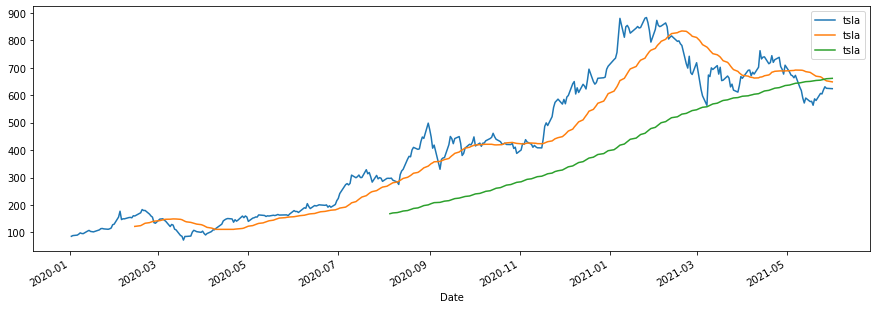

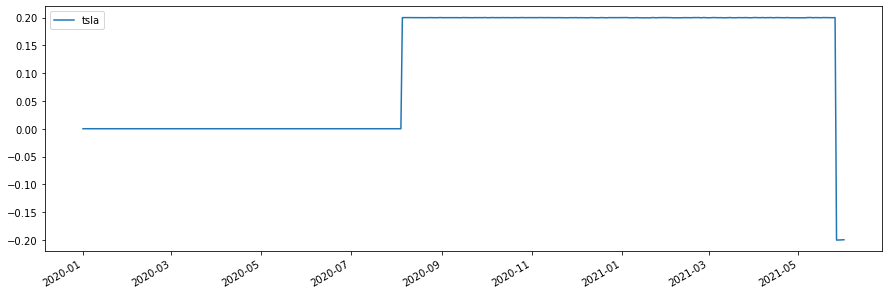

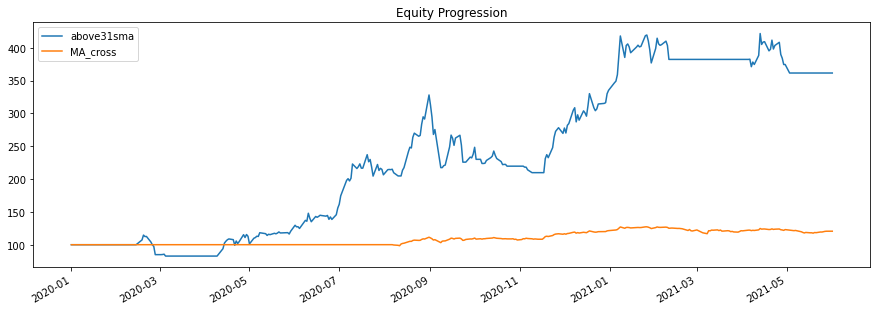

In [14]:
data = bt.get('TSLA', start='2020-01-01', end='2021-06-01')

short = 31
long = 150

sma_short = data.rolling(short).mean()
sma_long = data.rolling(long).mean()

# and compute sma_50 for replicating earlier strat
sma_31 = data.rolling(31).mean()

plot = bt.merge(data, sma_short, sma_long).plot(figsize=(15, 5))

target_weights = sma_long.copy()

target_weights[sma_short > sma_long] =  0.2
target_weights[sma_short <= sma_long] = -0.2

MA_cross = bt.Strategy('MA_cross', [bt.algos.WeighTarget(target_weights),
                                    bt.algos.Rebalance()])

test_MA = bt.Backtest(MA_cross, data)
res_MA = bt.run(test_MA)

res_MA.plot_security_weights()


# define a signal to feed to the SelectWhere class to select securities to trade
# The signal is simple, data>sma_50 because data is price and sma_50 is moving average
signal = data > sma_31
bt.algos.SelectWhere(signal, include_no_data=False)

# first we create the Strategy
s = bt.Strategy('above31sma', [bt.algos.SelectWhere(signal),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t, test_MA)

# what does the equity curve look like?
res.plot()

# and some performance stats
res.display()

# Now create a function that will allow us to generate related backtests more quickly
# This step is not required, but it is good programming practice
# I do not use these functions in this simple example, but they would be very useful
# if we were trying to pitimize our parameters
def above_sma(tickers, sma_per=31, start='2020-01-01', end='2021-06-01', name='above_sma'):
    """
    Long securities that are above their n period
    Simple Moving Averages with equal weights.
    """
    # download data
    data = bt.get(tickers, start=start)
    # calc sma
    sma = data.rolling(sma_per).mean()

    # create strategy
    s = bt.Strategy(name, [bt.algos.SelectWhere(data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

    # now we create the backtest
    return bt.Backtest(s, data)

# simple backtest to test long-only allocation
def long_only_ew(tickers, start='2020-01-01', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)